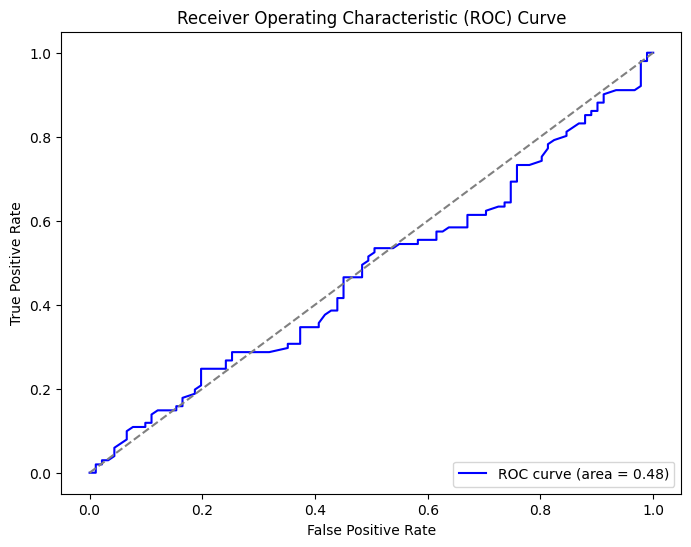

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load dataset
file_path = "cleaned_multi_source_dataset.csv"
df = pd.read_csv(file_path)

# Feature selection (excluding non-numeric identifiers and text columns)
features = ['Loyalty_Score']  # Example numeric feature; add more as needed
target = 'Actual_Label'

# Generate synthetic labels (since actual labels are missing)
df[target] = np.random.choice([0, 1], size=len(df))

# Handling categorical data (if any relevant features are added later)
le = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le.fit_transform(df['Gender'])
    features.append('Gender')

# Splitting dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


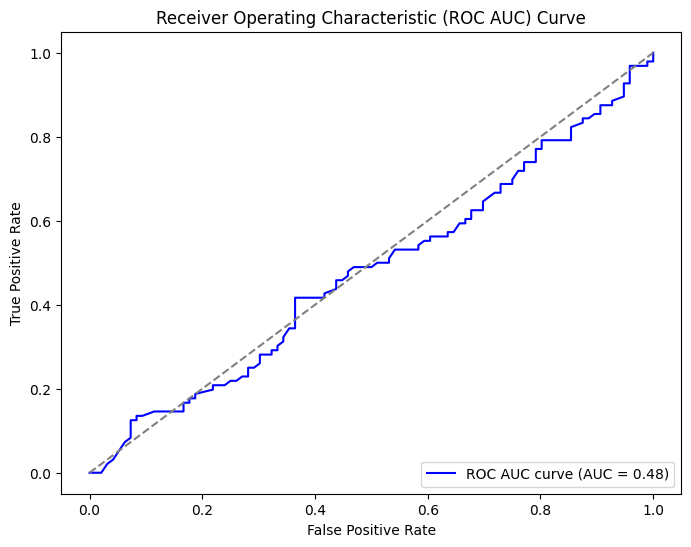

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load dataset
file_path = "cleaned_multi_source_dataset.csv"
df = pd.read_csv(file_path)

# Feature selection (excluding non-numeric identifiers and text columns)
features = ['Loyalty_Score']  # Example numeric feature; add more as needed
target = 'Actual_Label'

# Generate synthetic labels (since actual labels are missing)
df[target] = np.random.choice([0, 1], size=len(df))

# Handling categorical data (if any relevant features are added later)
le = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le.fit_transform(df['Gender'])
    features.append('Gender')

# Splitting dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC AUC) Curve')
plt.legend(loc='lower right')
plt.show()


In [8]:
%pip install seaborn


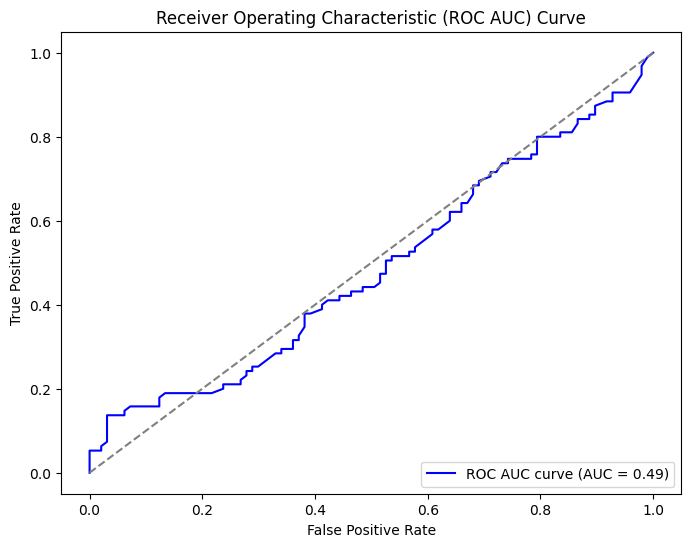

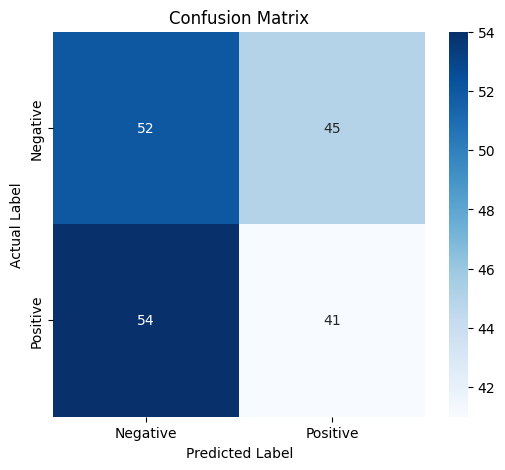

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

# Load dataset
file_path = "cleaned_multi_source_dataset.csv"
df = pd.read_csv(file_path)

# Feature selection (excluding non-numeric identifiers and text columns)
features = ['Loyalty_Score']  # Example numeric feature; add more as needed
target = 'Actual_Label'

# Generate synthetic labels (since actual labels are missing)
df[target] = np.random.choice([0, 1], size=len(df))

# Handling categorical data (if any relevant features are added later)
le = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le.fit_transform(df['Gender'])
    features.append('Gender')

# Splitting dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and labels
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC AUC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.32      0.40        97
           1       0.50      0.71      0.59        95

    accuracy                           0.51       192
   macro avg       0.51      0.51      0.49       192
weighted avg       0.51      0.51      0.49       192



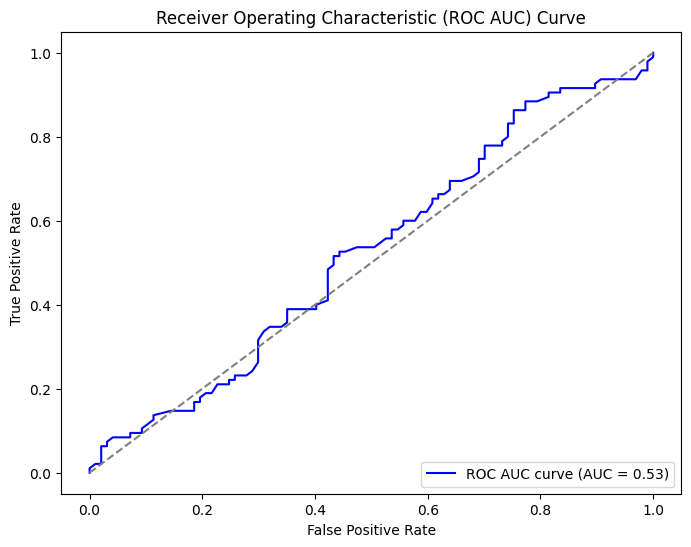

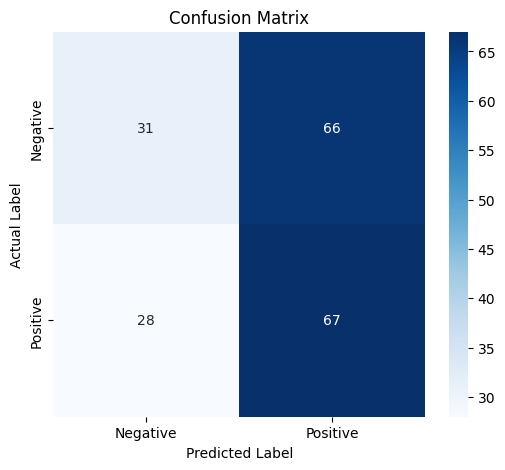

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# Load dataset
file_path = "cleaned_multi_source_dataset.csv"
df = pd.read_csv(file_path)

# Feature selection (excluding non-numeric identifiers and text columns)
features = ['Loyalty_Score']  # Example numeric feature; add more as needed
target = 'Actual_Label'

# Generate synthetic labels (since actual labels are missing)
df[target] = np.random.choice([0, 1], size=len(df))

# Handling categorical data (if any relevant features are added later)
le = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le.fit_transform(df['Gender'])
    features.append('Gender')

# Splitting dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and labels
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC AUC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
